In [23]:
import numpy as np 
import pandas as pd
import time
import json
import sys 


import pprint

import requests
from bs4 import BeautifulSoup

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.wait import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver import Chrome

In [24]:
url = "https://sg.1xbet.com/en/line/football"
options = webdriver.ChromeOptions()
options.add_argument("--headless")
driver = webdriver.Chrome(options=options)
driver.get(url)

url_response = requests.get(url)

if url_response.status_code != 200:
    print(f"Invalid Response: {url_response.status_code}")
    sys.exit()
else:
    print(f"Valid Response: {url_response.status_code}")


with open("1xbet.json", "w") as json_file: 
    json_file.write("")


time.sleep(15)

all_match_links = []
all_match_list = []

matches = driver.find_elements(By.XPATH, "//a[@class='dashboard-game-block__link dashboard-game-block-link']")
for span_element in matches:
    # Perform actions with the found elements, for example, printing the text content
    # print(span_element.get_attribute())
    attrs = driver.execute_script('var items = {}; for (index = 0; index < arguments[0].attributes.length; ++index) { items[arguments[0].attributes[index].name] = arguments[0].attributes[index].value }; return items;', span_element)
    pprint.pprint(attrs)
    print(span_element.text)
    all_match_list.append(span_element.text)
    all_match_links.append(span_element.get_attribute('href'))



# # # Find all <a> tags with class="c-events__name"
# events = driver.find_element(By.XPATH,"//a[@class='c-events__item c-events__item_col dashboard-champ-content__event-item']")
# print(events)
# # Extract information from each occurrence

driver.close()



Valid Response: 200
{'class': 'dashboard-game-block__link dashboard-game-block-link',
 'data-v-48a7cf16': '',
 'data-v-69f8f412': '',
 'href': '/en/line/football/88637-england-premier-league/199495424-bournemouth-nottingham-forest'}
Bournemouth
Nottingham Forest
{'class': 'dashboard-game-block__link dashboard-game-block-link',
 'data-v-48a7cf16': '',
 'data-v-69f8f412': '',
 'href': '/en/line/football/88637-england-premier-league/199495423-chelsea-wolverhampton-wanderers'}
Chelsea
Wolverhampton Wanderers
{'class': 'dashboard-game-block__link dashboard-game-block-link',
 'data-v-48a7cf16': '',
 'data-v-69f8f412': '',
 'href': '/en/line/football/88637-england-premier-league/199495396-manchester-united-west-ham-united'}
Manchester United
West Ham United
{'class': 'dashboard-game-block__link dashboard-game-block-link',
 'data-v-48a7cf16': '',
 'data-v-69f8f412': '',
 'href': '/en/line/football/88637-england-premier-league/199970378-home-away'}
Home
Away
{'class': 'dashboard-game-block__lin

In [25]:
all_match_list

['Bournemouth\nNottingham Forest',
 'Chelsea\nWolverhampton Wanderers',
 'Manchester United\nWest Ham United',
 'Home\nAway',
 'Arsenal\nLiverpool',
 'VfL Wolfsburg\nTSG 1899 Hoffenheim',
 'Home\nAway',
 'RasenBallsport Leipzig\nUnion Berlin',
 'Villarreal\nCadiz',
 'Osasuna\nCelta',
 'Home\nAway',
 'Real Betis\nGetafe',
 'Real Madrid\nAtletico Madrid',
 'Torino\nSalernitana 1919',
 'Napoli\nHellas Verona',
 'Home\nAway',
 'Atalanta\nLazio',
 'Internazionale Milano\nJuventus',
 'AS Monaco\nLe Havre',
 'Lille OSC\nClermont Foot']

In [26]:
all_match_links

['https://1xlite-792232.top/en/line/football/88637-england-premier-league/199495424-bournemouth-nottingham-forest',
 'https://1xlite-792232.top/en/line/football/88637-england-premier-league/199495423-chelsea-wolverhampton-wanderers',
 'https://1xlite-792232.top/en/line/football/88637-england-premier-league/199495396-manchester-united-west-ham-united',
 'https://1xlite-792232.top/en/line/football/88637-england-premier-league/199970378-home-away',
 'https://1xlite-792232.top/en/line/football/88637-england-premier-league/199495400-arsenal-liverpool',
 'https://1xlite-792232.top/en/line/football/96463-germany-bundesliga/199369123-vfl-wolfsburg-tsg-1899-hoffenheim',
 'https://1xlite-792232.top/en/line/football/96463-germany-bundesliga/199476131-home-away',
 'https://1xlite-792232.top/en/line/football/96463-germany-bundesliga/199369116-rasenballsport-leipzig-union-berlin',
 'https://1xlite-792232.top/en/line/football/127733-spain-la-liga/199469731-villarreal-cadiz',
 'https://1xlite-792232.t

In [27]:
from PIL import Image
import pytesseract
from io import BytesIO



pytesseract.pytesseract.tesseract_cmd = r"C:\Users\fooji\AppData\Local\Programs\Tesseract-OCR\tesseract.exe"


In [39]:
# def scrape_particular_odds(driver,
#                            path,
#                            search_element_xpath,
#                            json_results):
    

def DOM_exception_handling(path):

    action = False
    attempts = 0

    while attempts < 2:
        try:
            action = driver.find_element(By.XPATH,path)
            driver.refresh()
            break
        except StaleElementReferenceException:
            attempts += 1

    return action    

In [42]:
# sample_link = all_match_links[1]

suggested_bet_type = ['1x2','Over', 'Asian Total', 'Asian Handicap']


# options.add_argument("--headless")
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(options=options)



with open("Dump/1xbet.json",'w') as json_file:
    json_file.write("")

# # Problem: First Instance will open the hidden search box automatically
# # However, on the time the url is entered, search box is closed automatically.
# # idea: We create an exception on first instance
# url_counter = 0


for links in all_match_links:
    driver.get(links)
    time.sleep(5)
    driver.refresh()
    time.sleep(5)


    all_text = []

    # try:
    hidden_search=driver.find_element(By.XPATH,"//button[@class='search-button search-button--size-xxs']")
    hidden_search.click()

    # except:
    #     pass
    # search_box = DOM_exception_handling("//input[@placeholder='Search by market']")
    for bet_types in suggested_bet_type:

        # input()
        # search_box.send_keys(bet_types[:1])
        # search_box.send_keys(bet_types[1:])
        search_box=driver.find_element(By.XPATH,"//input[@class='search__input']")
        search_box=driver.find_element(By.XPATH,"//input[@placeholder='Search by market']")
        
        search_box.send_keys(bet_types)
        # search_box.send_keys(Keys.RETURN)

        time.sleep(0.5)

        # input()

        canvas = driver.find_element(By.XPATH, "//canvas[@class='market-grid-canvas__canvas']")

        # attrs = driver.execute_script('var items = {}; for (index = 0; index < arguments[0].attributes.length; ++index) { items[arguments[0].attributes[index].name] = arguments[0].attributes[index].value }; return items;', canvas)
        # print(canvas)

        # chatgpt
        # Capture the screenshot of the canvas
        canvas_screenshot = canvas.screenshot_as_png

        # Use pytesseract to extract text from the screenshot
        image = Image.open(BytesIO(canvas_screenshot))
        text = pytesseract.image_to_string(image)

        all_text.append(text)
        

        try:
            search_box.clear()
        except:
            pass 
    
    with open("Dump/1xbet.json",'a') as json_file:
        json_file.write(json.dumps(all_text))
        

driver.close()



KeyboardInterrupt: 

In [34]:
search_box 

<selenium.webdriver.remote.webelement.WebElement (session="a058434e70d051b6657d6ffc67460187", element="6D595F62B1F46B20749AF4A6E7D5EBB2_element_45")>

In [ ]:
all_text

['21K a\n\nwi 39 xX 3 w2 2.18\n\n;curnulator Of The Day N21\n\n24/01 @ Mauritania\n\n1.38\n0400 © Algeria\n\nEo epee kee ee ob bee Cc\n',
 '1.153\n\n',
 '# Asian Total\n\nover 0.75,\nOver 1.25,\nover 1.75,\nOver 2.25\n\nOver 2.75\n\n1.116\n\n1.387\n\n1.782\n\n2.392\n\n3.395\n\nUnder 0.75\n\nUnder 1.25\n\nUnder 1.75\n\nUnder 2.25\n\nUnder 2.75\n\n51\n\n2.814\n\n1.981\n\n1.484\n\n1.254\n',
 '@ Asian Handicap\n1¢1.25)\n1(0.78)\n1(0.25)\n1(40.25)\n\n1(+0.78)\n\n8.95\n\n4.945\n\n3.14\n\n1.939\n\n1.461\n\n2(+1.25)\n2(+0.75)\n2(+0.25)\n20.28)\n2(0.78)\n\n1.02\n\n1.124\n\n1.307\n\n1.735\n\n2.452\n']

['21K a\n\nwi 1.232 x 6.65 W2 2\n\n;curnulator Of The Day N21\n\n24/01 @ Mauritania\n\n1.38\n0400 © Algeria\n\nEo epee kee ee ob bee Cc\n',
 '1.02\n\n1.03\n\n1.098\n\n1.141\n\n141\n\n',
 '# Asian Total\n\nover 1.75,\nOver 2.25\nover 2.75,\nOver 3.25,\n\nOver 3.75\n\n1.129\n\n1.291\n\n1.508\n\n1.902\n\n2.316\n\nUnder 1.75\n\nUnder 2.25\n\nUnder 2.75\n\nUnder 3.25\n\nUnder 3.75\n\n5.35\n\n3.35\n\n2.442\n\n1.933\n\n1.56\n',
 '@ Asian Handicap\n1(3.75)\n1(3.25)\n1(278)\n1(2.28)\n\n1(1.75)\n\n5.56\n\n4.02\n\n2.917\n\n2.24\n\n1.825\n\n2978)\n2228)\n20278\n2228)\n\n2(#1.78)\n\n1.213\n\n1.37\n\n1.597\n\n2.019\n']


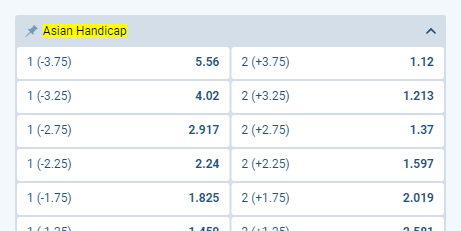

In [ ]:
image

In [ ]:
# response = requests.get(url)
# if response.status_code == 200:
#     # Parse the HTML content with BeautifulSoup
#     soup = BeautifulSoup(response.text, 'html.parser')

#     # Find all occurrences of the specified class
#     events=soup.find_all("div", {"class": "dashboard-champ-content"})

#     # Extract information from each occurrence
#     for event in events:
#         link = event['href']
#         event_name = event.find('span', class_='c-events__teams').get('title')
#         teams = [team.get_text(strip=True) for team in event.find_all('span', class_='c-events__team')]

#         print("Link:", link)
#         print("Event Name:", event_name)
#         print("Teams:", teams)
#         print("-----")
# else:
#     print(f"Failed to fetch the content. Status code: {response.status_code}")


In [ ]:
# soup

<!DOCTYPE html>

<html data-n-head="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" dir="ltr" lang="en">
<head><link href="https://v3.traincdn.com" rel="preconnect"/><link as="fetch" crossorigin="anonymous" href="https://v3.traincdn.com/version.json" rel="preload"/>
<title>Football: online sports betting ᐉ "1xBET" ᐉ 1xlite-784194.top</title><meta charset="utf-8" data-n-head="ssr"/><meta content="width=device-width, initial-scale=1, viewport-fit=cover" data-n-head="ssr" name="viewport"/><meta content="Bet on Football with 1xBET! Pre-match sports betting. Best odds. Bonus system. Reliable deposit and withdrawal methods. ᐉ 1xlite-784194.top" data-hid="description" data-n-head="ssr" name="description"/><meta content='Football: online sports betting ᐉ "1xBET" ᐉ 1xlite-784194.top' data-hid="og:title" data-n-head="ssr" name="og:title"/><meta content="Bet on Football with 1xBET! Pre-match sports betting. Best odds. Bonus system. Reliable deposi

In [ ]:
# soup.find_all("a")


[<a class="header-logo header__logo" data-v-03b5ecb7="" data-v-c0fbecb8="" href="/en"><img alt="1xBet" class="header-logo__img" data-v-c0fbecb8="" src="https://v3.traincdn.com/genfiles/cms/1-285/desktop/media_asset/7c43e6fa10d0665cf556d13ff2a1906d.svg"/></a>,
 <a class="header-navigation-link" data-v-78b8c616="" href="/en/line"><span class="header-navigation-link__label" data-v-78b8c616="">
                     Sports
                 </span></a>,
 <a class="header-navigation-link" data-v-78b8c616="" href="/en/live"><span class="header-navigation-link__label" data-v-78b8c616="">
                     Live
                 </span></a>,
 <a class="header-navigation-link" data-v-78b8c616="" href="/en/allgamesentrance"><span class="header-navigation-link__label" data-v-78b8c616="">
                     1xGames
                 </span></a>,
 <a class="header-navigation-link" data-v-78b8c616="" href="/en/slots"><span class="header-navigation-link__label" data-v-78b8c616="">
                  

In [ ]:
# class = "dashboard-game-block__link dashboard-game-block-link"